# Importing all necessary libraries in advance

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from scipy import stats
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator

In [4]:
from sklearn.linear_model import LinearRegression

from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import plot_tree


In [44]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

In [7]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/SchoolDropoutPreprocessed.csv') #for this i saved the file on my google drive
data.head()

Mounted at /content/drive


<ipython-input-7-a4a35cca32e2>:3: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/My Drive/SchoolDropoutPreprocessed.csv') #for this i saved the file on my google drive


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)2,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Column2
0,1.0,17.0,5.0,171.0,1.0,1.0,122.0,1.0,19.0,12.0,...,0.0,0.0,0.0,0,0.0,10.8,1.4,1.74,Dropout,NaN
1,1.0,15.0,1.0,9254.0,1.0,1.0,160.0,1.0,1.0,3.0,...,6.0,6.0,6.0,14,0.0,13.9,-0.3,0.79,Graduate,NaN
2,1.0,1.0,5.0,9070.0,1.0,1.0,122.0,1.0,37.0,37.0,...,6.0,0.0,0.0,0,0.0,10.8,1.4,1.74,Dropout,NaN
3,1.0,17.0,2.0,9773.0,1.0,1.0,122.0,1.0,38.0,37.0,...,6.0,10.0,5.0,12,0.0,9.4,-0.8,-3.12,Graduate,NaN
4,2.0,39.0,1.0,8014.0,0.0,1.0,100.0,1.0,37.0,38.0,...,6.0,6.0,6.0,13,0.0,13.9,-0.3,0.79,Graduate,NaN


In [8]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)2,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Column2
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,1.048575e+06,4424.000000,4424.000000,4424.000000,4424.000000,0.0
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.602170,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,4.331498e-02,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.187579,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,7.472578e-01,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,0.000000e+00,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.000000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,0.000000e+00,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,0.000000e+00,0.000000,13.900000,2.600000,1.790000,NaN
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,1.900000e+01,12.000000,16.200000,3.700000,3.510000,NaN


# **Data Cleaning and preparing**

Drop the Column2 and NaNs

In [9]:
data = data.drop('Column2', axis=1)
data = data.dropna()

In [10]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)2,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1.0,17.0,5.0,171.0,1.0,1.0,122.0,1.0,19.0,12.0,...,0.0,0.0,0.0,0.0,0,0.0,10.8,1.4,1.74,Dropout
1,1.0,15.0,1.0,9254.0,1.0,1.0,160.0,1.0,1.0,3.0,...,0.0,6.0,6.0,6.0,14,0.0,13.9,-0.3,0.79,Graduate
2,1.0,1.0,5.0,9070.0,1.0,1.0,122.0,1.0,37.0,37.0,...,0.0,6.0,0.0,0.0,0,0.0,10.8,1.4,1.74,Dropout
3,1.0,17.0,2.0,9773.0,1.0,1.0,122.0,1.0,38.0,37.0,...,0.0,6.0,10.0,5.0,12,0.0,9.4,-0.8,-3.12,Graduate
4,2.0,39.0,1.0,8014.0,0.0,1.0,100.0,1.0,37.0,38.0,...,0.0,6.0,6.0,6.0,13,0.0,13.9,-0.3,0.79,Graduate


Factorize "Target" from 'Dropout', 'Graduate', 'Enrollen' into numerical enumeration values 0, 1 and 2 respectively:


1.   Copy the dataset to avoid the permanent changes to a dataset
2.   With growing values for 'worth' with Dropout being lowest scored as 0, enrolled as 1 and finally Graduated with hightest value 2

In [11]:
d2 = data.copy()
d2['Target'] = pd.factorize(d2['Target'])[0]

def score(x):
  if x == 2: # graduate rated lowest as 2
    return 2
  elif x == 1: # enrolled rated hightest with 1
    return 1;
  elif x == 0: # dropout rated highest with 0
    return 0
  else:
    return -1

d2['Target'] = d2['Target'].apply(score)
d2.head(20)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)2,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1.0,17.0,5.0,171.0,1.0,1.0,122.0,1.0,19.0,12.0,...,0.0,0.0,0.0,0.0,0,0.0,10.8,1.4,1.74,0
1,1.0,15.0,1.0,9254.0,1.0,1.0,160.0,1.0,1.0,3.0,...,0.0,6.0,6.0,6.0,14,0.0,13.9,-0.3,0.79,1
2,1.0,1.0,5.0,9070.0,1.0,1.0,122.0,1.0,37.0,37.0,...,0.0,6.0,0.0,0.0,0,0.0,10.8,1.4,1.74,0
3,1.0,17.0,2.0,9773.0,1.0,1.0,122.0,1.0,38.0,37.0,...,0.0,6.0,10.0,5.0,12,0.0,9.4,-0.8,-3.12,1
4,2.0,39.0,1.0,8014.0,0.0,1.0,100.0,1.0,37.0,38.0,...,0.0,6.0,6.0,6.0,13,0.0,13.9,-0.3,0.79,1
5,2.0,39.0,1.0,9991.0,0.0,19.0,133.0,1.0,37.0,37.0,...,0.0,5.0,17.0,5.0,12,5.0,16.2,0.3,-0.92,1
6,1.0,1.0,1.0,9500.0,1.0,1.0,142.0,1.0,19.0,38.0,...,0.0,8.0,8.0,8.0,14,0.0,15.5,2.8,-4.06,1
7,1.0,18.0,4.0,9254.0,1.0,1.0,119.0,1.0,37.0,37.0,...,0.0,5.0,5.0,0.0,0,0.0,15.5,2.8,-4.06,0
8,1.0,1.0,3.0,9238.0,1.0,1.0,137.0,62.0,1.0,1.0,...,0.0,6.0,7.0,6.0,14,0.0,16.2,0.3,-0.92,1
9,1.0,1.0,1.0,9238.0,1.0,1.0,138.0,1.0,1.0,19.0,...,0.0,6.0,14.0,2.0,14,0.0,8.9,1.4,3.51,0


# Descriptive analytics

DataFrame definition

In [12]:
cr = d2.corr()
cr

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)2,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022945,-0.008843,0.193163,0.130353,...,0.062831,0.039026,0.022784,-0.043739,-0.071271,0.020426,-0.020338,0.008761,-0.027003,-0.074310
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039583,-0.000661,0.118974,0.083276,...,0.238445,0.130046,0.167872,-0.071526,-0.114105,0.047983,0.089080,-0.016375,-0.022743,-0.116928
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064164,-0.022416,-0.064956,-0.050288,...,-0.125815,0.028878,-0.055089,0.071793,0.052959,-0.015757,-0.098419,-0.011133,0.030201,0.027393
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081073,-0.033923,0.054543,0.050724,...,-0.089817,0.401539,0.278797,0.198032,0.348111,0.030816,0.007153,0.017710,-0.020265,0.024210
Daytime/evening attendance,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052926,0.018530,-0.204767,-0.139894,...,-0.111953,0.000371,0.014610,0.034022,0.050646,-0.004229,0.061974,-0.024043,0.022929,0.066439
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.103792,-0.029214,-0.013190,-0.006614,...,0.143031,0.056179,0.114850,-0.008632,0.002802,0.005102,0.111958,-0.063736,0.064069,-0.027984
Previous qualification (grade),-0.022945,-0.039583,-0.064164,-0.081073,0.052926,0.103792,1.000000,0.053903,-0.060908,-0.035358,...,-0.018421,-0.031591,-0.061337,0.050663,0.053118,-0.019093,0.045154,0.018728,-0.052663,0.025483
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.053903,1.000000,-0.049946,-0.085282,...,-0.007278,-0.020113,-0.025721,-0.017880,-0.009311,-0.014041,-0.000651,-0.008922,0.034478,0.002098
Mother's qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060908,-0.049946,1.000000,0.535140,...,0.042771,0.035150,0.021033,-0.014858,-0.031271,0.021305,-0.114351,0.059441,-0.083657,-0.075941
Father's qualification,0.130353,0.083276,-0.050288,0.050724,-0.139894,-0.006614,-0.035358,-0.085282,0.535140,1.000000,...,0.042666,0.024380,0.009514,0.005285,-0.009072,-0.007430,-0.077905,0.057633,-0.071610,-0.035183


In [13]:
df_statistics = data.groupby('Target').agg([np.mean, np.std])
statistics = df_statistics['Curricular units 2nd sem (grade)2']

In [14]:
statistics.head()

,mean,std
Target,,
Dropout,5.930331,6.15413
Enrolled,11.172544,3.63175
Graduate,12.730195,2.70644


Big heatmap for the whole dataset is missing

<Axes: >

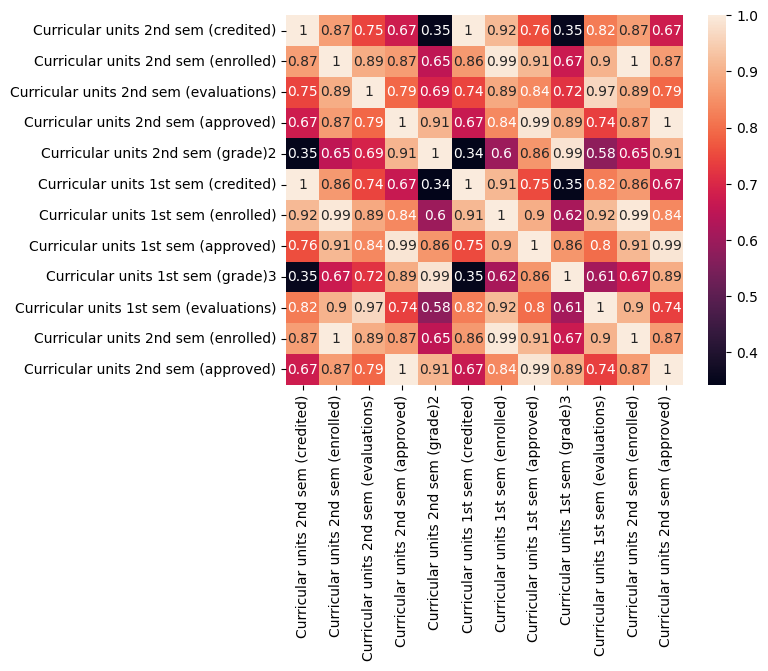

In [15]:
sns.heatmap(cr [['Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)2',
                 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)3', 'Curricular units 1st sem (evaluations)',
                 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)']].corr(),
            linewidths = 0.10, annot=True, fmt=".2g",
            linecolor = "none") # Default color

In [16]:
df = pd.DataFrame(['Curricular units 1st sem (grade)3', 'Curricular units 2nd sem (grade)2'])
df

,0
0,Curricular units 1st sem (grade)3
1,Curricular units 2nd sem (grade)2


In [17]:
x=data['Curricular units 1st sem (grade)3'].copy()
y=data['Curricular units 2nd sem (grade)2'].copy()

In [18]:
x

0        0
1       14
2        0
3       13
4       12
        ..
4419    14
4420    12
4421    15
4422    14
4423    12
Name: Curricular units 1st sem (grade)3, Length: 4424, dtype: int64

In [19]:
y

0        0
1       14
2        0
3       12
4       13
        ..
4419    13
4420    11
4421    14
4422    12
4423    13
Name: Curricular units 2nd sem (grade)2, Length: 4424, dtype: int64

Remove zeros for x and y axis

In [20]:
test = data[['Curricular units 1st sem (grade)3','Curricular units 2nd sem (grade)2']].copy() #copy of the dataset to avoid permanent changes to LinRegr df
test

,Curricular units 1st sem (grade)3,Curricular units 2nd sem (grade)2
0,0,0
1,14,14
2,0,0
3,13,12
4,12,13
...,...,...
4419,14,13
4420,12,11
4421,15,14
4422,14,12


In [21]:
d = test[(test!=0).all(1)] #remove zeros
d

,Curricular units 1st sem (grade)3,Curricular units 2nd sem (grade)2
1,14,14
3,13,12
4,12,13
5,12,12
6,13,14
...,...,...
4419,14,13
4420,12,11
4421,15,14
4422,14,12


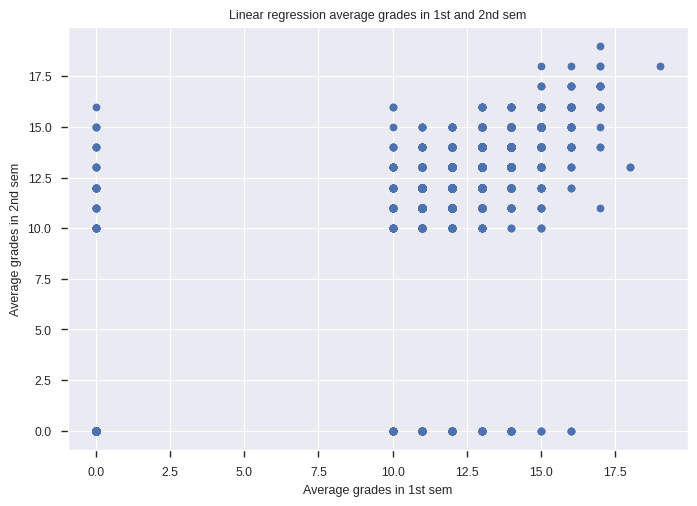

In [22]:
plt.style.use("seaborn-v0_8")
sns.set_context('paper')
plt.scatter(x,y)
plt.xlabel('Average grades in 1st sem', fontsize=9)
plt.ylabel('Average grades in 2nd sem', fontsize=9)
plt.title('Linear regression average grades in 1st and 2nd sem', fontsize=9)
plt.show()

Remove zeros for x and y axis

In [23]:
test = data[['Curricular units 1st sem (grade)3','Curricular units 2nd sem (grade)2', 'Target']].copy() #copy of the dataset to avoid permanent changes to LinRegr df
test

,Curricular units 1st sem (grade)3,Curricular units 2nd sem (grade)2,Target
0,0,0,Dropout
1,14,14,Graduate
2,0,0,Dropout
3,13,12,Graduate
4,12,13,Graduate
...,...,...,...
4419,14,13,Graduate
4420,12,11,Dropout
4421,15,14,Dropout
4422,14,12,Graduate


In [24]:
d = test[(test!=0).all(1)] #remove zeros
d

,Curricular units 1st sem (grade)3,Curricular units 2nd sem (grade)2,Target
1,14,14,Graduate
3,13,12,Graduate
4,12,13,Graduate
5,12,12,Graduate
6,13,14,Graduate
...,...,...,...
4419,14,13,Graduate
4420,12,11,Dropout
4421,15,14,Dropout
4422,14,12,Graduate


In [25]:
print(x.shape)
x_matrix=x.values.reshape(-1,1) #converting a row into a column
print(x_matrix.shape)

(4424,)
(4424, 1)


In [26]:
reg = LinearRegression()
reg.fit(x_matrix,y) #actual application of regression

LinearRegression()

In [27]:
a = reg.intercept_
a

0.6775968362624454

In [28]:
b = reg.coef_
b

array([0.89776754])

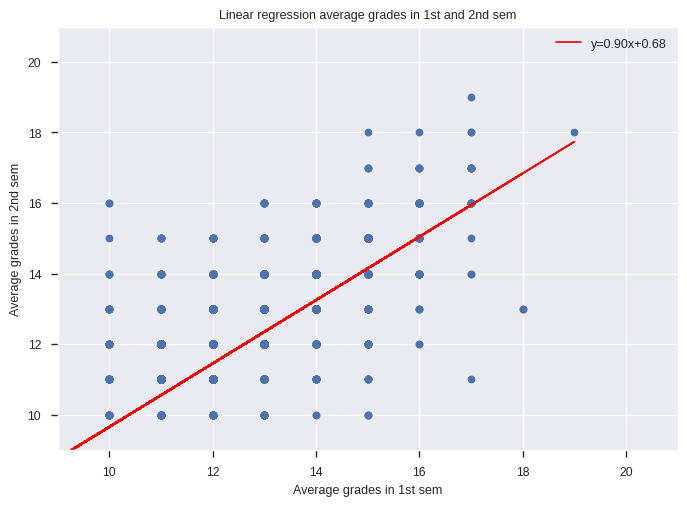

In [29]:
plt.scatter(x,y)
sns.set_context('paper')
y_calculated = a + x_matrix*b
#plt.plot(x, y_calculated, c='black')
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x, line, 'red', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Average grades in 1st sem', fontsize=9)
plt.ylabel('Average grades in 2nd sem', fontsize=9)
plt.title('Linear regression average grades in 1st and 2nd sem', fontsize=9)
plt.legend(fontsize=9)
plt.axis([9, 21, 9, 21])
plt.show()

In [30]:
np.random.seed(19680801)

Factorize "Target" from 'Dropout', 'Graduate', 'Enrollen' into numerical enumeration values 0, 1 and 2 respectively:

Copy the dataset to avoid the permanent changes to a dataset
With growing values for 'worth' with Dropout being lowest scored as 0, enrolled as 1 and finally Graduated with hightest value 2

In [31]:
x=data['Curricular units 1st sem (grade)3']
y=data['Curricular units 2nd sem (grade)2']
z=data['Target']

def score(x):
  if x == 'Graduate': # graduate rated lowest as 2
    return 2
  elif x == 'Dropout': # dropout rated hightest with 0
    return 0;
  elif x == 'Enrolled': # enrolled rated with 1
    return 1
  else:
    return -1

z = z.apply(score)

In [32]:
z

0       0
1       2
2       0
3       2
4       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Target, Length: 4424, dtype: int64

In [33]:
labels, levels = pd.factorize(z)
labels

array([0, 1, 0, ..., 0, 1, 1])

Have to fix the error!!!

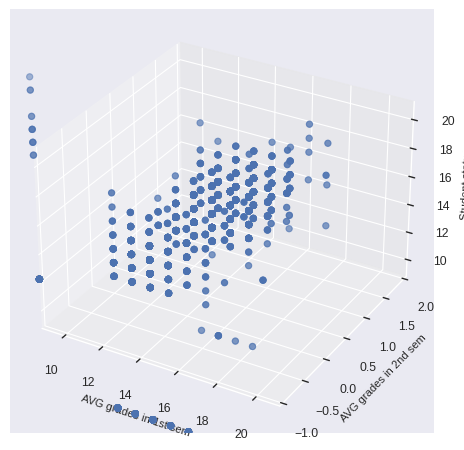

In [34]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(x,labels,y)
ax.set_xlabel('AVG grades in 1st sem', fontsize=8)
ax.set_ylabel('AVG grades in 2nd sem', fontsize=8)
ax.set_zlabel('Student status', fontsize=8)
ax.set_xlim(9,21)
ax.set_zlim(9,21)
ax.set_ylim(-1,2)
plt.show()

In [36]:
test = data[['Curricular units 1st sem (grade)3','Curricular units 2nd sem (grade)2', 'Target']].copy()
test

,Curricular units 1st sem (grade)3,Curricular units 2nd sem (grade)2,Target
0,0,0,Dropout
1,14,14,Graduate
2,0,0,Dropout
3,13,12,Graduate
4,12,13,Graduate
...,...,...,...
4419,14,13,Graduate
4420,12,11,Dropout
4421,15,14,Dropout
4422,14,12,Graduate


In [37]:
d = test[(test!=0).all(1)]
d

,Curricular units 1st sem (grade)3,Curricular units 2nd sem (grade)2,Target
1,14,14,Graduate
3,13,12,Graduate
4,12,13,Graduate
5,12,12,Graduate
6,13,14,Graduate
...,...,...,...
4419,14,13,Graduate
4420,12,11,Dropout
4421,15,14,Dropout
4422,14,12,Graduate


2 means graduate
1 - enrolled
0 means dropout

New scatterplot with the right target values

In [38]:
x=d['Curricular units 1st sem (grade)3']
y=d['Curricular units 2nd sem (grade)2']
z=d['Target']

def score(x):
  if x == 'Graduate': # graduate rated lowest as 2
    return 2
  elif x == 'Dropout': # dropout rated hightest with 0
    return 0;
  elif x == 'Enrolled': # enrolled rated with 1
    return 1
  else:
    return -1

z = z.apply(score)
z

1       2
3       2
4       2
5       2
6       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Target, Length: 3512, dtype: int64

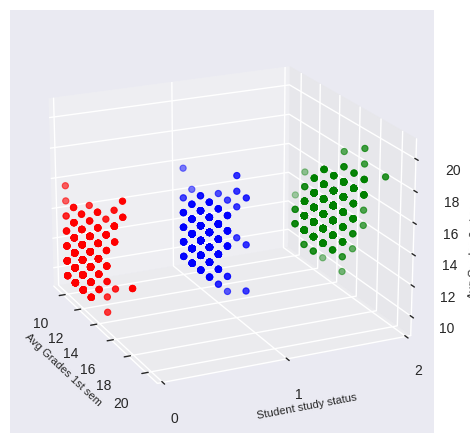

In [39]:
plt.style.use("seaborn-v0_8-notebook")
ax = plt.figure().add_subplot(projection='3d')
sns.set_context('paper')

def pltcol(lst):
  cols=[];
  for l in lst:
    if l==0:
      cols.append('red') # dropout
    elif l==1:
      cols.append('blue') # enrolled
    else:
      cols.append('green') # graduated
  return cols

cols = pltcol(z);

ax.scatter(x,z,y, c=cols)

ax.set_xlabel('Avg Grades 1st sem', fontsize=8)
ax.set_zlabel('Avg Grades 2nd sem', fontsize=8)
ax.set_ylabel('Student study status', fontsize=8)

ax.set_xlim(9,21)
ax.set_zlim(9,21)
ax.set_ylim(0,2)
ax.set_yticks(range(0,3), [0,1,2])
ax.view_init(elev=20., azim=-25, roll=0)

plt.show()


# KMeans Clustering

Choose the appropriate number of clusters by using Elbow Method

Scaling the values just in case

Creating th eKMeans class and setting the parameters
*   **init** controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". Setting this to "k-means++" employs an advanced trick to speed up convergence, which you’ll use later.
*   **n_clusters** sets k for the clustering
step. This is the most important parameter for k-means.
*   **n_init** sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.
*   **max_iter** sets the number of maximum iterations for each initialization of the k-means algorithm


Fitting the estimator to the data.

Obtaining the statistics from the initialisation run with the lowest SSE. They are in form of attributes:

Cluster assignments are stored as a one-dimensional NumPy array in `kmeans.labels_`
the order of the cluster labels for the first two data objects was flipped. The order was [0, 0, 0, 1, 2] in `true_labels` but [2, 2, 1, 1, 0] in kmeans.labels_ even though those data objects are still members of their original clusters in kmeans.lables_. This behavior is normal, as the ordering of cluster labels is dependent on the initialization. Cluster 0 from the first run could be labeled cluster 1 in the second run and vice versa. This doesn’t affect clustering evaluation metrics.

In [41]:
cluster_data = data.copy()

cluster_data = cluster_data.dropna()
#cluster_data = data.drop("Column2", axis=1)

def score(x):
  if x == 'Graduate': # graduate rated lowest as 2
    return 2
  elif x == 'Dropout': # dropout rated hightest with 0
    return 0;
  elif x == 'Enrolled': # enrolled rated with 1
    return 1
  else:
    return -1

cluster_data['Target'] = cluster_data['Target'].apply(score)
cluster_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)2,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1.0,17.0,5.0,171.0,1.0,1.0,122.0,1.0,19.0,12.0,...,0.0,0.0,0.0,0.0,0,0.0,10.8,1.4,1.74,0
1,1.0,15.0,1.0,9254.0,1.0,1.0,160.0,1.0,1.0,3.0,...,0.0,6.0,6.0,6.0,14,0.0,13.9,-0.3,0.79,2
2,1.0,1.0,5.0,9070.0,1.0,1.0,122.0,1.0,37.0,37.0,...,0.0,6.0,0.0,0.0,0,0.0,10.8,1.4,1.74,0
3,1.0,17.0,2.0,9773.0,1.0,1.0,122.0,1.0,38.0,37.0,...,0.0,6.0,10.0,5.0,12,0.0,9.4,-0.8,-3.12,2
4,2.0,39.0,1.0,8014.0,0.0,1.0,100.0,1.0,37.0,38.0,...,0.0,6.0,6.0,6.0,13,0.0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1.0,1.0,6.0,9773.0,1.0,1.0,125.0,1.0,1.0,1.0,...,0.0,6.0,8.0,5.0,13,0.0,15.5,2.8,-4.06,2
4420,1.0,1.0,2.0,9773.0,1.0,1.0,120.0,105.0,1.0,1.0,...,0.0,6.0,6.0,2.0,11,0.0,11.1,0.6,2.02,0
4421,1.0,1.0,1.0,9500.0,1.0,1.0,154.0,1.0,37.0,37.0,...,0.0,8.0,9.0,1.0,14,0.0,13.9,-0.3,0.79,0
4422,1.0,1.0,1.0,9147.0,1.0,1.0,180.0,1.0,37.0,37.0,...,0.0,5.0,6.0,5.0,12,0.0,9.4,-0.8,-3.12,2


Standartization of Data

In [42]:
kmeans_df = cluster_data
X_std = StandardScaler().fit_transform(kmeans_df)# Standardize the data to have a mean of ~0 and a variance of 1

Perform Dimensionality Reduction with PCA

In [45]:
pca = PCA()
pca.fit(X_std)
pca.explained_variance_ratio_
#len(pca.explained_variance_ratio_)

array([0.17577788, 0.1033073 , 0.05790541, 0.05464235, 0.0526843 ,
       0.04548863, 0.0431184 , 0.04195647, 0.03493309, 0.03409894,
       0.03005054, 0.02745359, 0.02678546, 0.02549465, 0.02360975,
       0.02218993, 0.02196427, 0.01987076, 0.01806012, 0.01590131,
       0.01532218, 0.01446381, 0.0125937 , 0.0122726 , 0.0111896 ,
       0.01060675, 0.00947956, 0.00850048, 0.00625948, 0.00557264,
       0.00510578, 0.0044723 , 0.00253307, 0.00246975, 0.00234462,
       0.00095893, 0.0005616 ])

Text(0, 0.5, 'Cumulative Explained Variance')

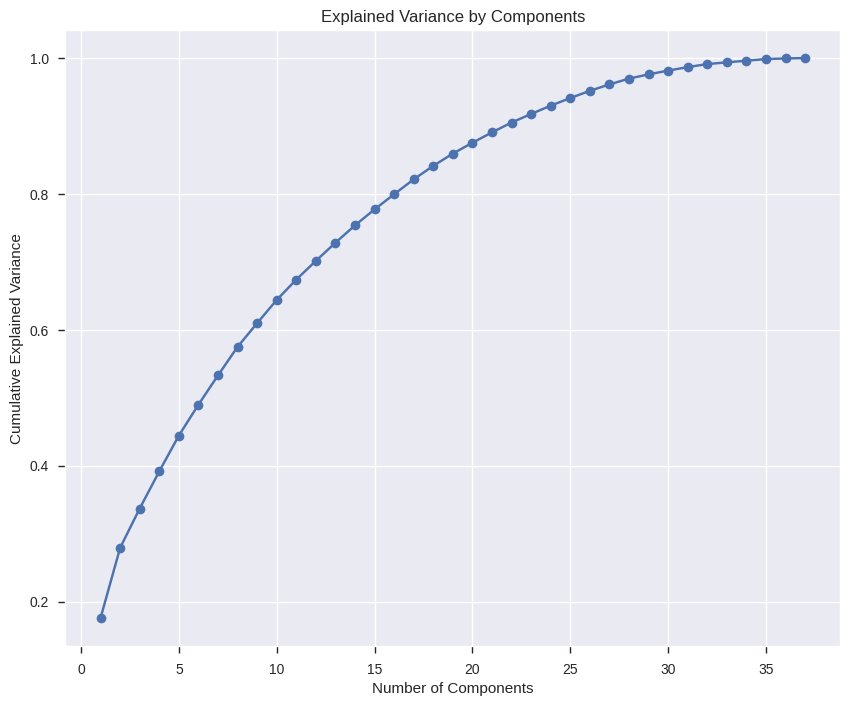

In [46]:
plt.style.use("seaborn-v0_8-notebook")
plt.figure(figsize = (10,8))
plt.plot(range(1,38), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='-')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [47]:
pca = PCA(n_components = 3)
pca.fit(X_std)
score_pca = pca.transform(X_std)
score_pca

array([[-6.21198212, -0.48201904,  1.50137764],
       [-0.04205656, -1.30412962,  1.59718221],
       [-4.17536598,  0.57030121,  0.55225935],
       ...,
       [ 0.56696582, -0.75959393, -0.65455945],
       [-0.20850699, -2.37995465, -0.68799533],
       [ 0.39455738, -1.32741695,  0.41429981]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

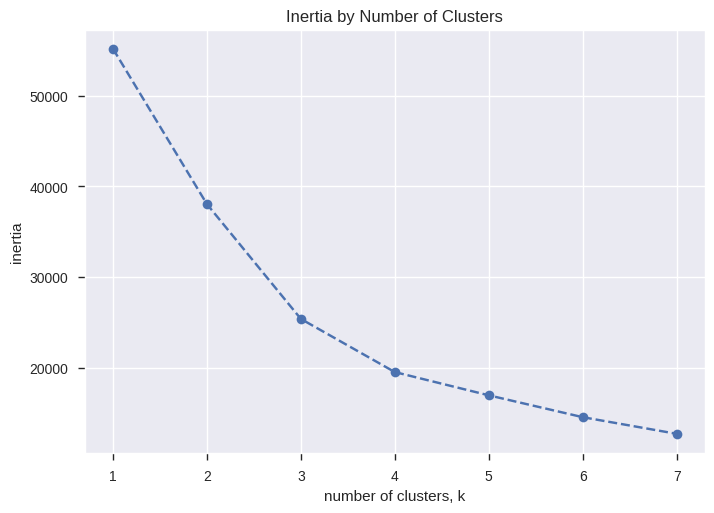

In [48]:
ks = range(1, 8)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, init='k-means++', random_state = 42)

    # Fit model to samples
    model.fit(score_pca)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
plt.style.use("seaborn-v0_8-notebook")
plt.plot(ks, inertias, '-o', linestyle='--')
plt.title('Inertia by Number of Clusters')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [49]:
kl = KneeLocator(range(1, 8), inertias, curve="convex", direction="decreasing")
kl.elbow

3

In [50]:
kmean_pca = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmean_pca.fit(score_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [52]:
kmean_final_data = data.copy();

kmean_final_data = kmean_final_data.dropna()
kmean_final_data


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)2,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1.0,17.0,5.0,171.0,1.0,1.0,122.0,1.0,19.0,12.0,...,0.0,0.0,0.0,0.0,0,0.0,10.8,1.4,1.74,Dropout
1,1.0,15.0,1.0,9254.0,1.0,1.0,160.0,1.0,1.0,3.0,...,0.0,6.0,6.0,6.0,14,0.0,13.9,-0.3,0.79,Graduate
2,1.0,1.0,5.0,9070.0,1.0,1.0,122.0,1.0,37.0,37.0,...,0.0,6.0,0.0,0.0,0,0.0,10.8,1.4,1.74,Dropout
3,1.0,17.0,2.0,9773.0,1.0,1.0,122.0,1.0,38.0,37.0,...,0.0,6.0,10.0,5.0,12,0.0,9.4,-0.8,-3.12,Graduate
4,2.0,39.0,1.0,8014.0,0.0,1.0,100.0,1.0,37.0,38.0,...,0.0,6.0,6.0,6.0,13,0.0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1.0,1.0,6.0,9773.0,1.0,1.0,125.0,1.0,1.0,1.0,...,0.0,6.0,8.0,5.0,13,0.0,15.5,2.8,-4.06,Graduate
4420,1.0,1.0,2.0,9773.0,1.0,1.0,120.0,105.0,1.0,1.0,...,0.0,6.0,6.0,2.0,11,0.0,11.1,0.6,2.02,Dropout
4421,1.0,1.0,1.0,9500.0,1.0,1.0,154.0,1.0,37.0,37.0,...,0.0,8.0,9.0,1.0,14,0.0,13.9,-0.3,0.79,Dropout
4422,1.0,1.0,1.0,9147.0,1.0,1.0,180.0,1.0,37.0,37.0,...,0.0,5.0,6.0,5.0,12,0.0,9.4,-0.8,-3.12,Graduate


In [54]:
df_final = pd.concat([kmean_final_data.reset_index(drop=True), pd.DataFrame(score_pca)], axis=1)
df_final.columns.values[-3:] = ['Component1', 'Component2','Component3']
df_final['Segment K-means PCA'] = kmean_pca.labels_
df_final.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (grade)2,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Component1,Component2,Component3,Segment K-means PCA
0,1.0,17.0,5.0,171.0,1.0,1.0,122.0,1.0,19.0,12.0,...,0,0.0,10.8,1.4,1.74,Dropout,-6.211982,-0.482019,1.501378,2
1,1.0,15.0,1.0,9254.0,1.0,1.0,160.0,1.0,1.0,3.0,...,14,0.0,13.9,-0.3,0.79,Graduate,-0.042057,-1.304130,1.597182,0
2,1.0,1.0,5.0,9070.0,1.0,1.0,122.0,1.0,37.0,37.0,...,0,0.0,10.8,1.4,1.74,Dropout,-4.175366,0.570301,0.552259,2
3,1.0,17.0,2.0,9773.0,1.0,1.0,122.0,1.0,38.0,37.0,...,12,0.0,9.4,-0.8,-3.12,Graduate,0.568187,-1.097526,-0.812928,0
4,2.0,39.0,1.0,8014.0,0.0,1.0,100.0,1.0,37.0,38.0,...,13,0.0,13.9,-0.3,0.79,Graduate,0.444261,2.244366,-2.759199,0
5,2.0,39.0,1.0,9991.0,0.0,19.0,133.0,1.0,37.0,37.0,...,12,5.0,16.2,0.3,-0.92,Graduate,0.880303,4.474804,-0.949838,2
6,1.0,1.0,1.0,9500.0,1.0,1.0,142.0,1.0,19.0,38.0,...,14,0.0,15.5,2.8,-4.06,Graduate,1.584262,-2.069387,-0.373036,0
7,1.0,18.0,4.0,9254.0,1.0,1.0,119.0,1.0,37.0,37.0,...,0,0.0,15.5,2.8,-4.06,Dropout,-3.672233,1.647354,0.931999,2
8,1.0,1.0,3.0,9238.0,1.0,1.0,137.0,62.0,1.0,1.0,...,14,0.0,16.2,0.3,-0.92,Graduate,0.561455,-2.379783,2.156193,0
9,1.0,1.0,1.0,9238.0,1.0,1.0,138.0,1.0,1.0,19.0,...,14,0.0,8.9,1.4,3.51,Dropout,-0.447185,0.003652,1.049003,0


In [55]:
df_final['Segment'] = df_final['Segment K-means PCA'].map({0:'first', 1:'second', 2:'third'})
df_final

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Component1,Component2,Component3,Segment K-means PCA,Segment
0,1.0,17.0,5.0,171.0,1.0,1.0,122.0,1.0,19.0,12.0,...,0.0,10.8,1.4,1.74,Dropout,-6.211982,-0.482019,1.501378,2,third
1,1.0,15.0,1.0,9254.0,1.0,1.0,160.0,1.0,1.0,3.0,...,0.0,13.9,-0.3,0.79,Graduate,-0.042057,-1.304130,1.597182,0,first
2,1.0,1.0,5.0,9070.0,1.0,1.0,122.0,1.0,37.0,37.0,...,0.0,10.8,1.4,1.74,Dropout,-4.175366,0.570301,0.552259,2,third
3,1.0,17.0,2.0,9773.0,1.0,1.0,122.0,1.0,38.0,37.0,...,0.0,9.4,-0.8,-3.12,Graduate,0.568187,-1.097526,-0.812928,0,first
4,2.0,39.0,1.0,8014.0,0.0,1.0,100.0,1.0,37.0,38.0,...,0.0,13.9,-0.3,0.79,Graduate,0.444261,2.244366,-2.759199,0,first
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1.0,1.0,6.0,9773.0,1.0,1.0,125.0,1.0,1.0,1.0,...,0.0,15.5,2.8,-4.06,Graduate,0.140297,-1.886054,1.155019,0,first
4420,1.0,1.0,2.0,9773.0,1.0,1.0,120.0,105.0,1.0,1.0,...,0.0,11.1,0.6,2.02,Dropout,-1.332171,-0.385649,3.755517,2,third
4421,1.0,1.0,1.0,9500.0,1.0,1.0,154.0,1.0,37.0,37.0,...,0.0,13.9,-0.3,0.79,Dropout,0.566966,-0.759594,-0.654559,0,first
4422,1.0,1.0,1.0,9147.0,1.0,1.0,180.0,1.0,37.0,37.0,...,0.0,9.4,-0.8,-3.12,Graduate,-0.208507,-2.379955,-0.687995,0,first


Visualisation of segments with respect to f

K-Means 3D

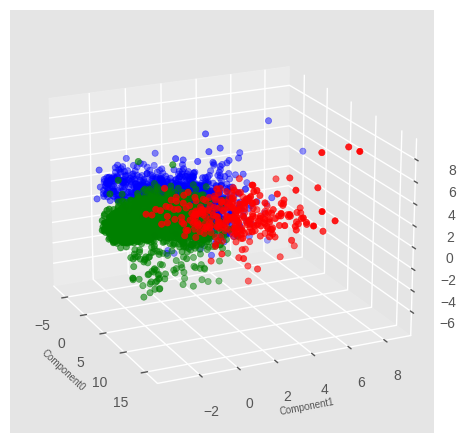

In [56]:
plt.style.use("ggplot")
x_axis=df_final['Component1']
y_axis=df_final['Component3']
z_axis=df_final['Component2']
group=df_final['Segment K-means PCA'];
ax = plt.figure().add_subplot(projection='3d')

def pltcol(lst):
  cols=[];
  for l in lst:
    if l==0:
      cols.append('green') # graduate
    elif l==1:
      cols.append('red') # dropout
    else:
      cols.append('blue') # enrolled
  return cols

cols = pltcol(group);


ax.scatter(x_axis,z_axis,y_axis,c=cols)

ax.set_xlabel('Component0', fontsize=7)
ax.set_zlabel('Component2', fontsize=7)
ax.set_ylabel('Component1', fontsize=7)
#ax.set_xlim(9,21)
#ax.set_zlim(9,21)
#ax.set_ylim(0,2)
#ax.set_yticks(range(0,3), [0,1,2])
ax.view_init(elev=20., azim=-25, roll=0)
plt.show()

In [57]:
z_axis

0      -0.482019
1      -1.304130
2       0.570301
3      -1.097526
4       2.244366
          ...   
4419   -1.886054
4420   -0.385649
4421   -0.759594
4422   -2.379955
4423   -1.327417
Name: Component2, Length: 4424, dtype: float64

K-Means 2D

<ipython-input-58-d145daf1a98c>:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x = x_axis, y = y_axis, hue = df_final['Segment K-means PCA'], palette = ['g', 'r', 'b','m'])


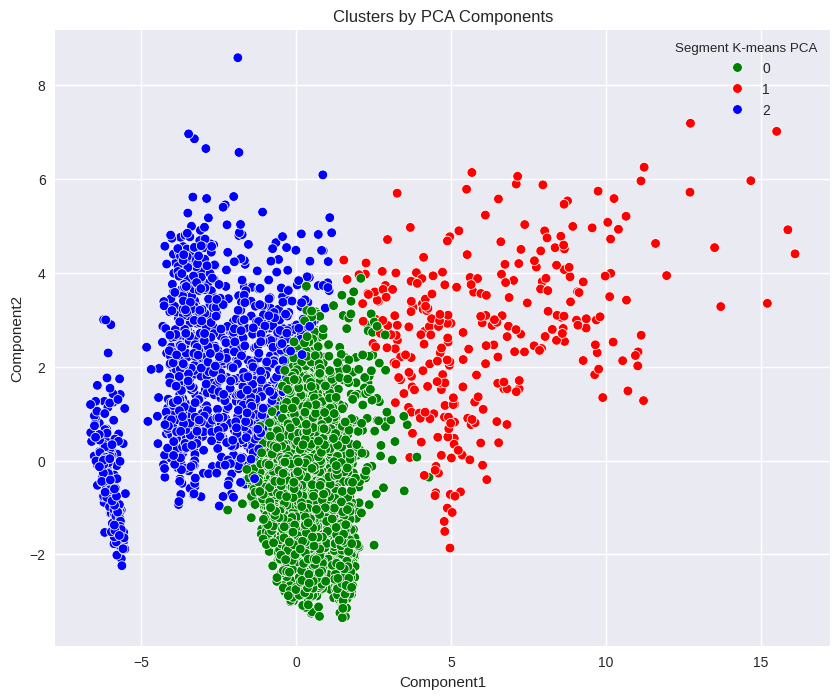

In [58]:
plt.style.use("seaborn-v0_8")
x_axis=df_final['Component1']
y_axis=df_final['Component2']
plt.figure(figsize = (10,8))
sns.scatterplot(x = x_axis, y = y_axis, hue = df_final['Segment K-means PCA'], palette = ['g', 'r', 'b','m'])
plt.title("Clusters by PCA Components")
plt.show()

# Classifiers:

1.  **KNN**



Euclidian distance

In [59]:
from sklearn.neighbors import KNeighborsClassifier

Define DataFrame for the KNN

In [60]:
KNN_df = data.copy();
KNN_df = KNN_df.dropna()

def score(x):
  if x == 'Graduate': # graduate rated lowest as 2
    return 2
  elif x == 'Dropout': # dropout rated hightest with 0
    return 0;
  elif x == 'Enrolled': # enrolled rated with 1
    return 1
  else:
    return -1

KNN_df['Target'] = KNN_df['Target'].apply(score)
KNN_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)2,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1.0,17.0,5.0,171.0,1.0,1.0,122.0,1.0,19.0,12.0,...,0.0,0.0,0.0,0.0,0,0.0,10.8,1.4,1.74,0
1,1.0,15.0,1.0,9254.0,1.0,1.0,160.0,1.0,1.0,3.0,...,0.0,6.0,6.0,6.0,14,0.0,13.9,-0.3,0.79,2
2,1.0,1.0,5.0,9070.0,1.0,1.0,122.0,1.0,37.0,37.0,...,0.0,6.0,0.0,0.0,0,0.0,10.8,1.4,1.74,0
3,1.0,17.0,2.0,9773.0,1.0,1.0,122.0,1.0,38.0,37.0,...,0.0,6.0,10.0,5.0,12,0.0,9.4,-0.8,-3.12,2
4,2.0,39.0,1.0,8014.0,0.0,1.0,100.0,1.0,37.0,38.0,...,0.0,6.0,6.0,6.0,13,0.0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1.0,1.0,6.0,9773.0,1.0,1.0,125.0,1.0,1.0,1.0,...,0.0,6.0,8.0,5.0,13,0.0,15.5,2.8,-4.06,2
4420,1.0,1.0,2.0,9773.0,1.0,1.0,120.0,105.0,1.0,1.0,...,0.0,6.0,6.0,2.0,11,0.0,11.1,0.6,2.02,0
4421,1.0,1.0,1.0,9500.0,1.0,1.0,154.0,1.0,37.0,37.0,...,0.0,8.0,9.0,1.0,14,0.0,13.9,-0.3,0.79,0
4422,1.0,1.0,1.0,9147.0,1.0,1.0,180.0,1.0,37.0,37.0,...,0.0,5.0,6.0,5.0,12,0.0,9.4,-0.8,-3.12,2


In [80]:
  knn_df = KNN_df[['Curricular units 1st sem (credited)','Curricular units 2nd sem (credited)','Target']].copy()


In [81]:
knn_df

,Curricular units 1st sem (credited),Curricular units 2nd sem (credited),Target
0,0.0,0.0,0
1,0.0,0.0,2
2,0.0,0.0,0
3,0.0,0.0,2
4,0.0,0.0,2
...,...,...,...
4419,0.0,0.0,2
4420,0.0,0.0,0
4421,0.0,0.0,0
4422,0.0,0.0,2


KNN DAtaFrame is split

In [86]:
target = data['Target']
features = KNN_df.drop('Target', axis=1)
#features = data1.drop('Target', axis=1)

Impoort the modules to split the data and measure accuracy

In [87]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.5)

In [88]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.fit_transform(features_test)

Fitting and evaluating the model (Regressor, because numerical values for dropout, graduated and enrolled)

In [89]:
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, features_train, target_train, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

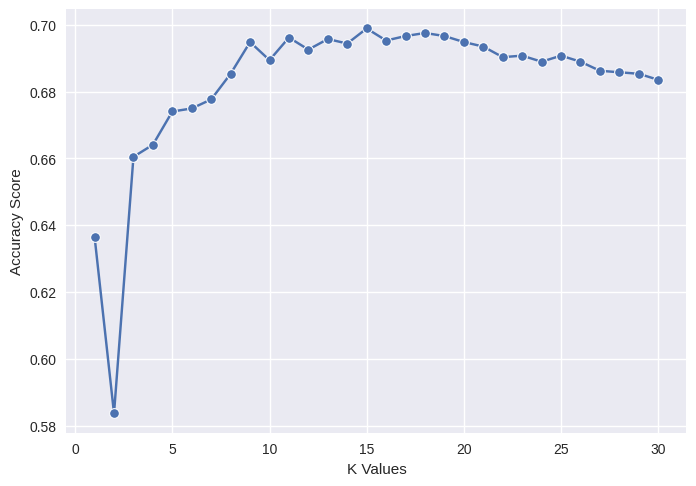

In [90]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

To find the best K Value

In [91]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(features_train, target_train)

KNeighborsClassifier(n_neighbors=15)

In [92]:
target_pred = knn.predict(features_test)

accuracy = accuracy_score(target_test, target_pred)
precision_macro = precision_score(target_test, target_pred, average='macro')
precision_micro = precision_score(target_test, target_pred, average='micro')
precision_weighted = precision_score(target_test, target_pred, average='weighted')
recall_macro = recall_score(target_test, target_pred, average='macro')
recall_micro = recall_score(target_test, target_pred, average='micro')
recall_weighted = recall_score(target_test, target_pred, average='weighted')

y_true = target_test
y_true = y_true.values
le = preprocessing.LabelEncoder() # We are using label encoder to convert categorical labels to number
le.fit(y_true) # Since this array contains both classes 'y' and 'n'.
print(list(le.classes_)) # To check the classes which are encoded

y_true = le.transform(y_true)
y_pred = le.transform(target_pred)


MSE = mean_squared_error(y_true, y_pred) # Calculating MSE
rmse = sqrt(MSE)

cm = confusion_matrix(y_true,y_pred) # Creation of Confusion Matrix

print("Accuracy:", accuracy)
print("Precision:", precision_macro)
print("Precision:", precision_micro)
print("Precision:", precision_weighted)
print("Recall:", recall_macro)
print("Recall:", recall_micro)
print("Recall:", recall_weighted)
print("RMSE:", rmse)
print(cm)

['Dropout', 'Enrolled', 'Graduate']
Accuracy: 0.7138336347197106
Precision: 0.6636260357934592
Precision: 0.7138336347197106
Precision: 0.6990020880474747
Recall: 0.588865164911076
Recall: 0.7138336347197106
Recall: 0.7138336347197106
RMSE: 0.7733700704208721
[[ 438   57  202]
 [  61   74  255]
 [  28   30 1067]]


SSME - The average error is practically 1, because my values are 0, 1, 2 accounting for the Dropout, Enrolled and Graduated

Confusion Matrix

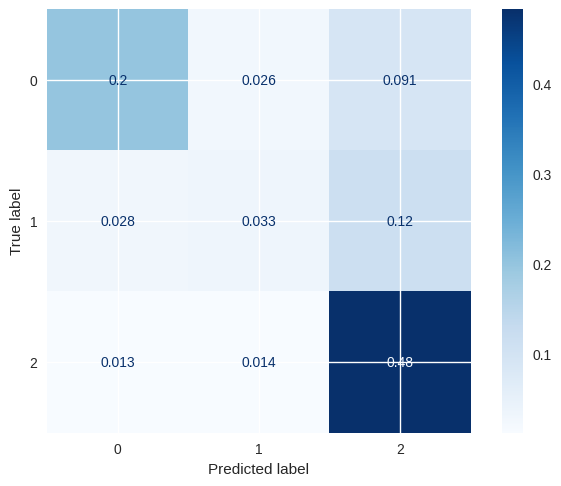

In [93]:
cm = confusion_matrix(target_test, target_pred, normalize='all')
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)

Results: 48% of The Dropout student classes were recognised correctly with  0.7133 accuracy, 0.6962 Precision and 0.7133 recall. RMSE being 0.7710

# Classifiers: Random Forest

Splitting the Dataset into training and test data 50/50

In [94]:
rf_data = knn_df.copy()

In [95]:
rf_data

,Curricular units 1st sem (credited),Curricular units 2nd sem (credited),Target
0,0.0,0.0,0
1,0.0,0.0,2
2,0.0,0.0,0
3,0.0,0.0,2
4,0.0,0.0,2
...,...,...,...
4419,0.0,0.0,2
4420,0.0,0.0,0
4421,0.0,0.0,0
4422,0.0,0.0,2


In [99]:
target = rf_data['Target']
features = rf_data.drop('Target', axis=1)
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.5)

In [100]:
RDF = RandomForestClassifier(n_estimators=2)
RDF = RDF.fit(features_train, target_train)

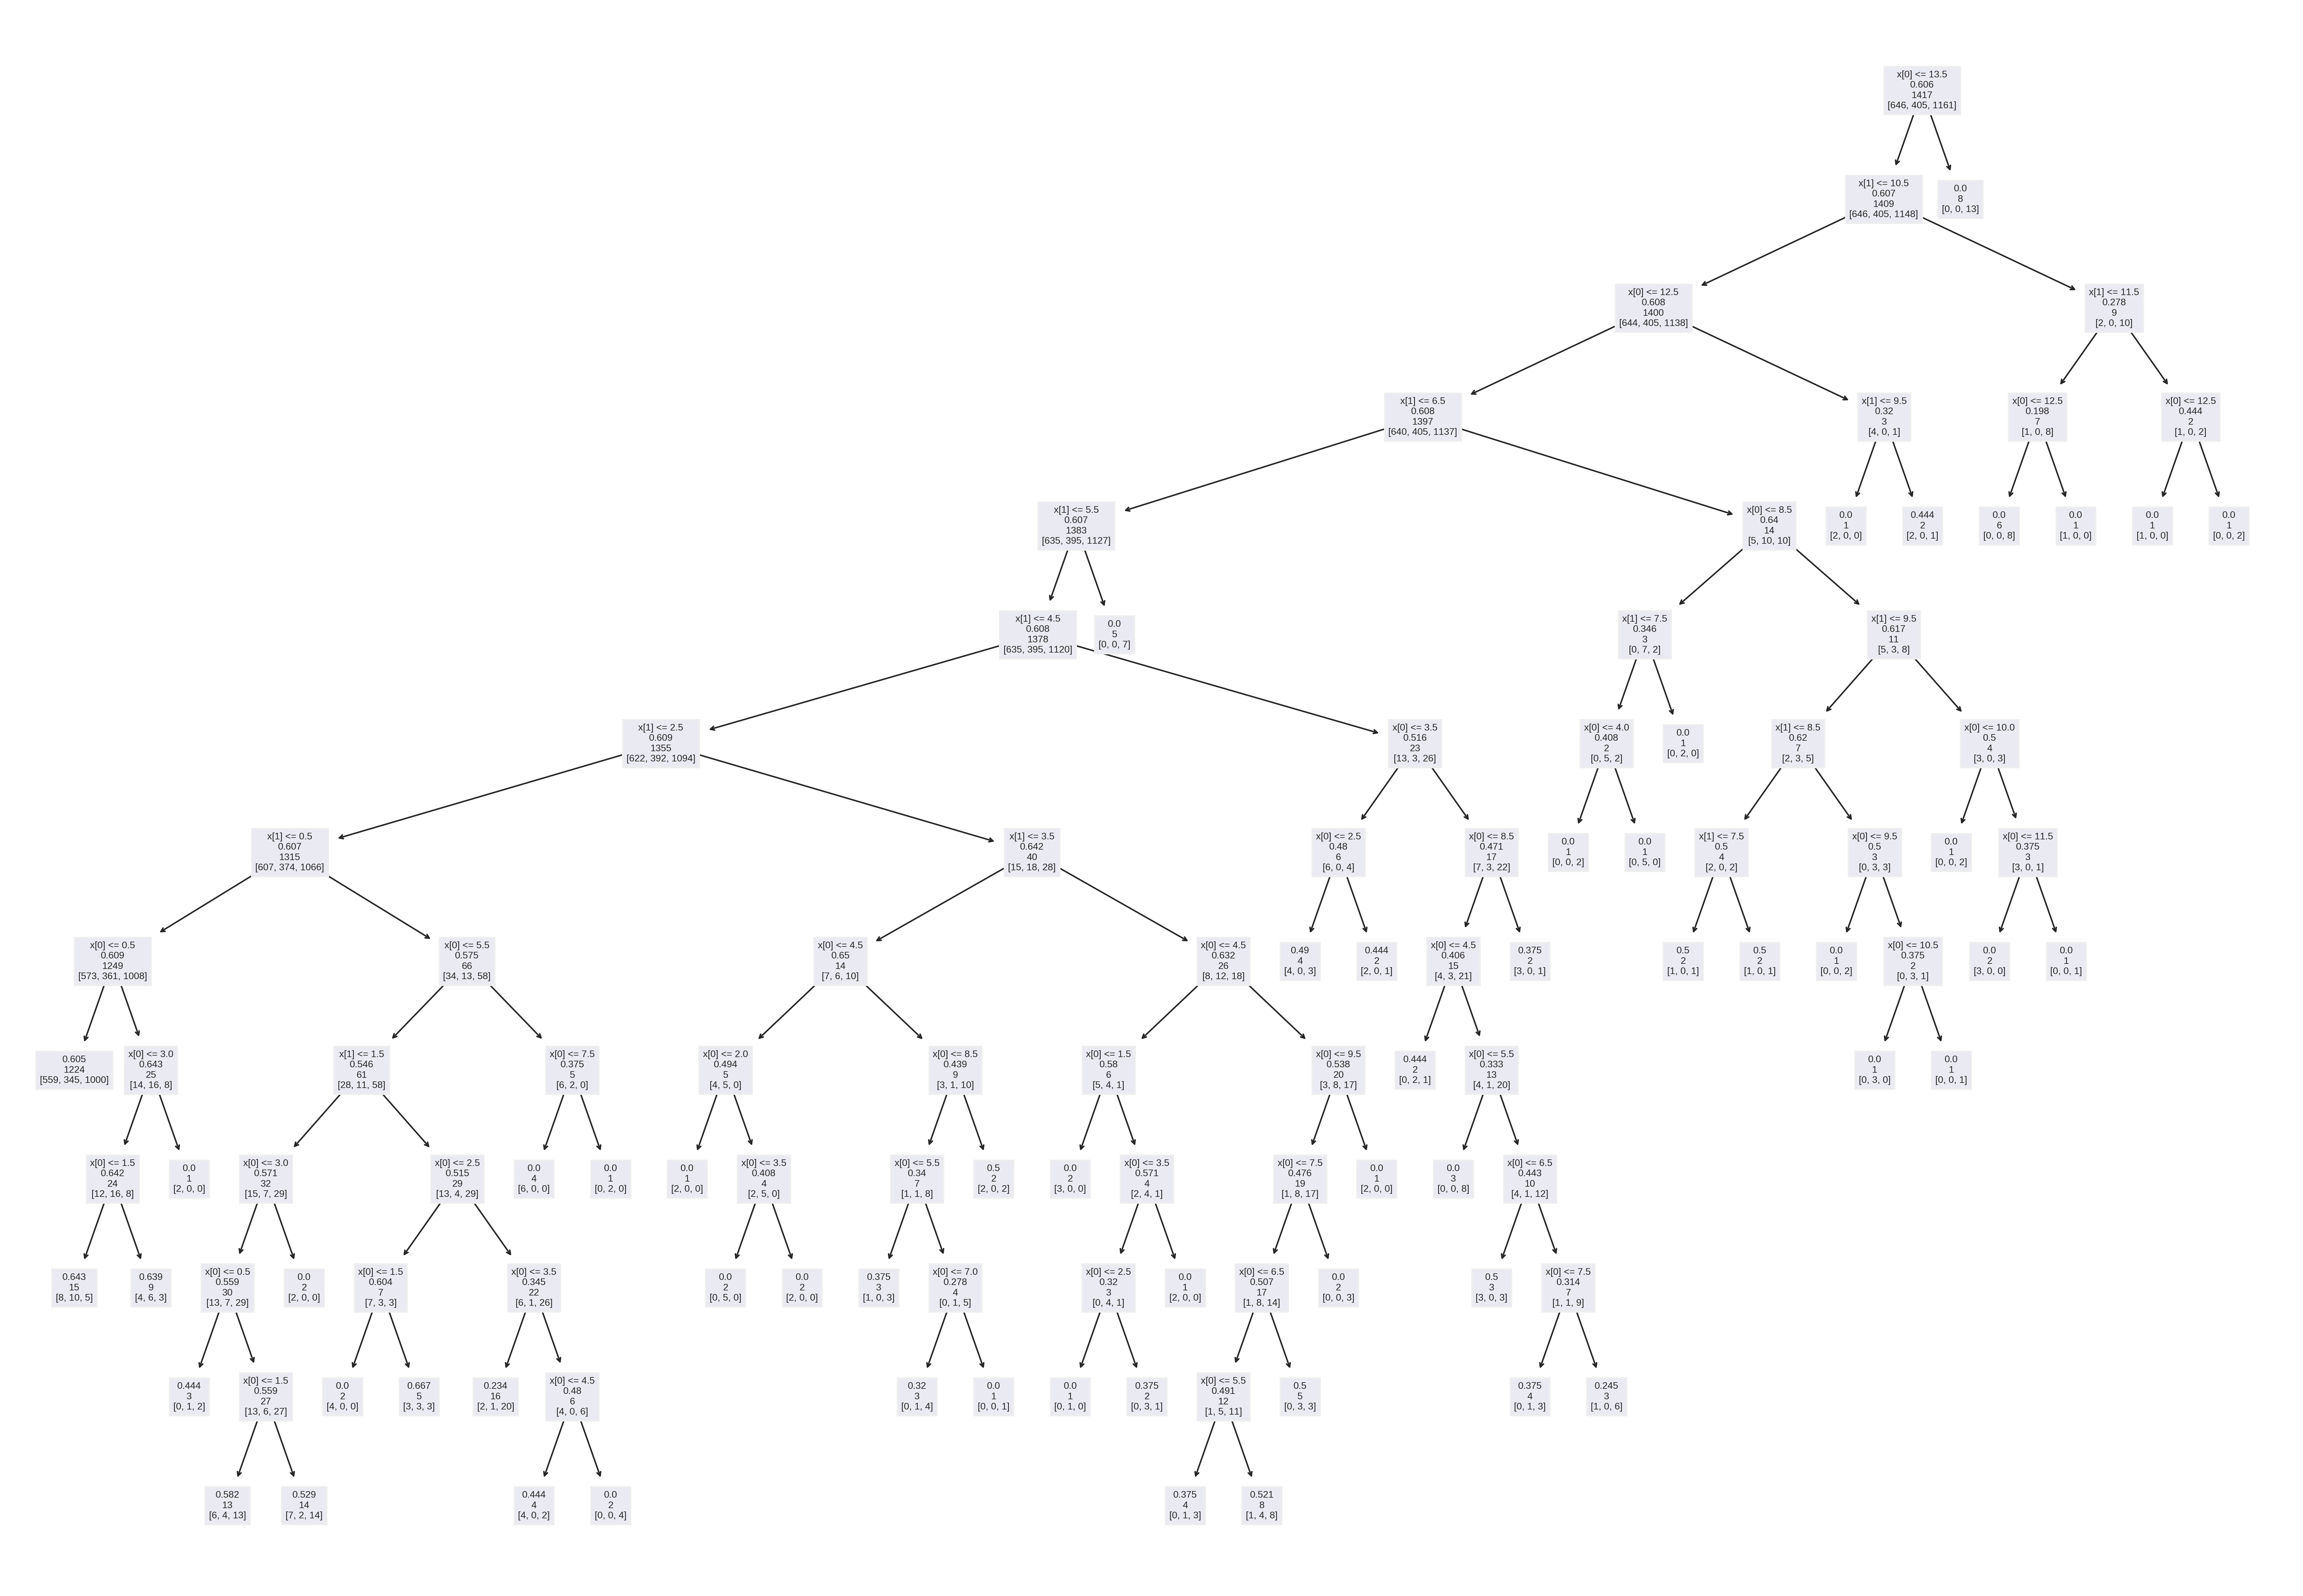

In [102]:
fig, axes = plt.subplots(dpi=1200)
tree.plot_tree(RDF.estimators_[0], label=None);

In [103]:
target_pred = RDF.predict(features_test)
target_pred

array([2, 2, 2, ..., 2, 0, 0])

In [104]:
accuracy = accuracy_score(target_test, target_pred)
precision_macro = precision_score(target_test, target_pred, average='macro')
precision_micro = precision_score(target_test, target_pred, average='micro')
precision_weighted = precision_score(target_test, target_pred, average='weighted')
recall_macro = recall_score(target_test, target_pred, average='macro')
recall_micro = recall_score(target_test, target_pred, average='micro')
recall_weighted = recall_score(target_test, target_pred, average='weighted')

y_true = target_test
y_true = y_true.values
le = preprocessing.LabelEncoder() # We are using label encoder to convert categorical labels to number
le.fit(y_true) # Since this array contains both classes 'y' and 'n'.
print(list(le.classes_)) # To check the classes which are encoded

y_true = le.transform(y_true)
y_pred = le.transform(target_pred)


MSE = mean_squared_error(y_true, y_pred) # Calculating MSE
rmse = sqrt(MSE)

cm = confusion_matrix(y_true,y_pred) # Creation of Confusion Matrix

print("Accuracy:", accuracy)
print("Precision:", precision_macro)
print("Precision:", precision_micro)
print("Precision:", precision_weighted)
print("Recall:", recall_macro)
print("Recall:", recall_micro)
print("Recall:", recall_weighted)
print("RMSE:", rmse)
print(cm)

[0, 1, 2]
Accuracy: 0.4859855334538879
Precision: 0.35017811925724174
Precision: 0.4859855334538879
Precision: 0.3964800698146427
Recall: 0.33696152731038365
Recall: 0.4859855334538879
Recall: 0.4859855334538879
RMSE: 1.2130618233799018
[[  35    9  664]
 [  20    6  386]
 [  42   16 1034]]


In [105]:
cm = confusion_matrix(target_test, target_pred, normalize='all')
cm

array([[0.01582278, 0.00406872, 0.30018083],
       [0.00904159, 0.00271248, 0.17450271],
       [0.01898734, 0.00723327, 0.46745027]])

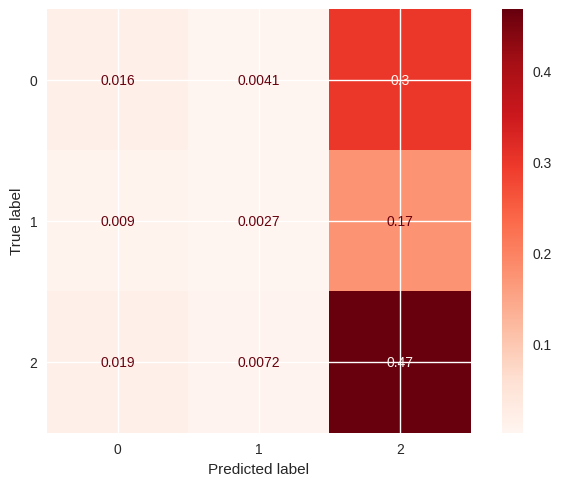

In [106]:
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Reds)

In [107]:
f1_score(y_true = target_test, y_pred = target_pred, average=None)

array([0.08695652, 0.02708804, 0.6511335 ])

In [108]:
f1_score(y_true = target_test, y_pred = target_pred, average='macro')

0.25505935303865257

In [109]:
f1_score(y_true = target_test, y_pred = target_pred, average='micro')

0.4859855334538879

In [110]:
f1_score(y_true = target_test, y_pred = target_pred, average='weighted')

0.3543233596957416

# J48 Decision Tree

N-2

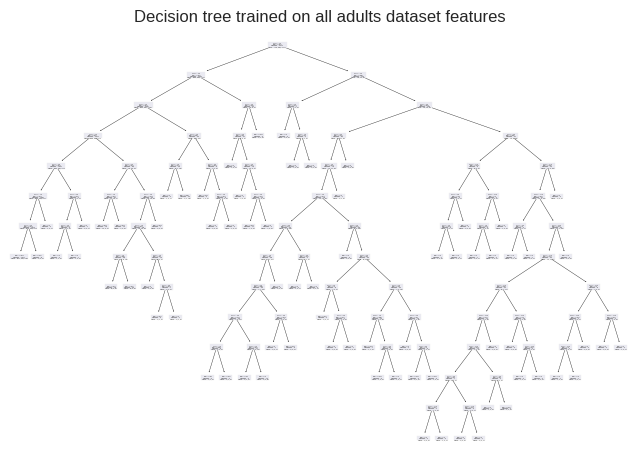

In [111]:
DecTree_N2 = tree.DecisionTreeClassifier(max_features = 2)
DecTree = DecTree_N2.fit(features_train, target_train)
plt.figure()
plot_tree(DecTree_N2)
plt.title("Decision tree trained on all adults dataset features")
plt.show()

In [112]:
target_pred = DecTree_N2.predict(features_test)

accuracy = accuracy_score(target_test, target_pred)
precision_macro = precision_score(target_test, target_pred, average='macro')
precision_micro = precision_score(target_test, target_pred, average='micro')
precision_weighted = precision_score(target_test, target_pred, average='weighted')
recall_macro = recall_score(target_test, target_pred, average='macro')
recall_micro = recall_score(target_test, target_pred, average='micro')
recall_weighted = recall_score(target_test, target_pred, average='weighted')

y_true = target_test
y_true = y_true.values
le = preprocessing.LabelEncoder() # We are using label encoder to convert categorical labels to number
le.fit(y_true) # Since this array contains both classes 'y' and 'n'.
print(list(le.classes_)) # To check the classes which are encoded

y_true = le.transform(y_true)
y_pred = le.transform(target_pred)


MSE = mean_squared_error(y_true, y_pred) # Calculating MSE
rmse = sqrt(MSE)

cm = confusion_matrix(y_true,y_pred) # Creation of Confusion Matrix

print("Accuracy:", accuracy)
print("Precision:", precision_macro)
print("Precision:", precision_micro)
print("Precision:", precision_weighted)
print("Recall:", recall_macro)
print("Recall:", recall_micro)
print("Recall:", recall_weighted)
print("RMSE:", rmse)
print(cm)

[0, 1, 2]
Accuracy: 0.4859855334538879
Precision: 0.3207088122605364
Precision: 0.4859855334538879
Precision: 0.3775235393153333
Recall: 0.33528453427252175
Recall: 0.4859855334538879
Recall: 0.4859855334538879
RMSE: 1.2136207092991547
[[  34   11  663]
 [  22    3  387]
 [  44   10 1038]]


In [113]:
print("Accuracy:", accuracy_score(target_test, target_pred))

Accuracy: 0.4859855334538879


In [114]:
cm = confusion_matrix(target_test, target_pred, normalize='all')
cm

array([[0.01537071, 0.00497288, 0.29972875],
       [0.00994575, 0.00135624, 0.17495479],
       [0.0198915 , 0.0045208 , 0.46925859]])

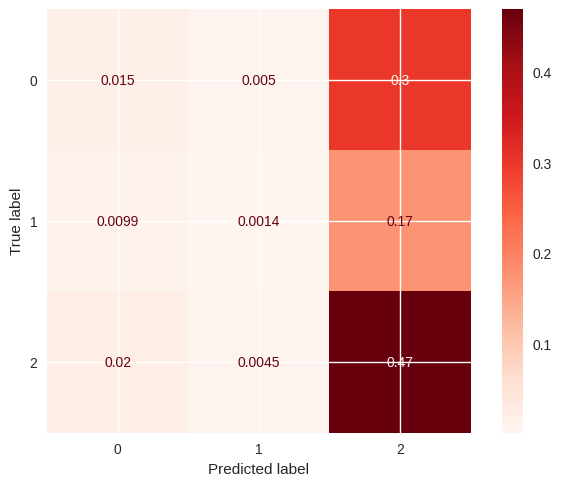

In [115]:
cm_display = ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Reds)